In [230]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
votacao = pd.read_csv('app/app/data/votacao_secao_2022_BR.csv', encoding='latin1', sep=';')

KeyboardInterrupt: 

In [ ]:
votacao[votacao.NR_TURNO == 2].head(1).T

,3523
DT_GERACAO,01/11/2022
HH_GERACAO,16:05:25
ANO_ELEICAO,2022
CD_TIPO_ELEICAO,2
NM_TIPO_ELEICAO,ELEIÇÃO ORDINÁRIA
NR_TURNO,2
CD_ELEICAO,545
DS_ELEICAO,ELEIÇÃO GERAL FEDERAL 2022
DT_ELEICAO,30/10/2022
TP_ABRANGENCIA,F


In [ ]:
vot_mun = votacao[votacao.NR_TURNO == 2].pivot_table(index=['SG_UF','CD_MUNICIPIO','NM_MUNICIPIO'], columns='NR_VOTAVEL', values='QT_VOTOS', aggfunc='sum', margins=True).reset_index()
vot_mun

NR_VOTAVEL,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,13,22,95,96,All
0,AC,1007,BUJARI,1958.0,4693.0,88.0,107.0,6846
1,AC,1015,CAPIXABA,1497.0,3963.0,34.0,56.0,5550
2,AC,1023,PORTO ACRE,2317.0,7384.0,66.0,113.0,9880
3,AC,1031,SANTA ROSA DO PURUS,1217.0,1127.0,17.0,64.0,2425
4,AC,1040,MARECHAL THAUMATURGO,2742.0,3710.0,47.0,122.0,6621
...,...,...,...,...,...,...,...,...
5706,ZZ,99287,LUSACA,13.0,1.0,NaN,NaN,14
5707,ZZ,99317,TALIN,156.0,23.0,1.0,11.0,191
5708,ZZ,99430,KINGSTON-JAMAICA,11.0,10.0,NaN,NaN,21
5709,ZZ,99473,BAREIN,11.0,25.0,NaN,4.0,40


In [ ]:
vot_uf = votacao[votacao.NR_TURNO == 2].pivot_table(index=['SG_UF',], columns='NR_VOTAVEL', values='QT_VOTOS', aggfunc='sum', margins=True).reset_index()
vot_uf

NR_VOTAVEL,SG_UF,13,22,95,96,All
0,AC,121566,287750,4722,6722,420760
1,AL,976831,687827,23376,96954,1784988
2,AM,1004991,961741,21594,79549,2067875
3,AP,189918,200547,4018,6200,400683
4,BA,6097815,2357028,121221,395664,8971728
5,CE,3807891,1634477,67045,139985,5649398
6,DF,729295,1041331,29663,38203,1838492
7,ES,926767,1282145,37214,76143,2322269
8,GO,1542115,2193041,43610,81585,3860351
9,MA,2668425,1082749,35807,67823,3854804


In [ ]:
votacao.loc[(votacao.NM_MUNICIPIO == 'RECIFE')]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
333380,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,237,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,146,1279,280001607829,COLEGIO MARISTA SAO LUÍS,"AV. RUI BARBOSA, 1104"
2270568,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,237,1,PRESIDENTE,95,VOTO BRANCO,6,1279,-1,COLEGIO MARISTA SAO LUÍS,"AV. RUI BARBOSA, 1104"
2285188,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,237,1,PRESIDENTE,96,VOTO NULO,11,1279,-1,COLEGIO MARISTA SAO LUÍS,"AV. RUI BARBOSA, 1104"
3189568,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,237,1,PRESIDENTE,22,JAIR MESSIAS BOLSONARO,187,1279,280001618036,COLEGIO MARISTA SAO LUÍS,"AV. RUI BARBOSA, 1104"


In [ ]:
vot_mun.loc[vot_mun.NM_MUNICIPIO == 'NOVA IORQUE']

NR_VOTAVEL,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,13,22,95,96,All
1272,MA,8451,NOVA IORQUE,0.800337,0.179125,0.004714,0.015825,1.0


In [ ]:
vot_mun[vot_mun.columns[3:]] = vot_mun[vot_mun.columns[3:]].div(vot_mun.All, axis=0)

In [ ]:
vot_mun.loc[vot_mun.NM_MUNICIPIO == 'ITUIUTABA']

NR_VOTAVEL,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,13,22,95,96,All
1816,MG,46833,ITUIUTABA,0.543111,0.430477,0.009485,0.016926,1.0


In [ ]:
(vot_mun.loc[vot_mun.NM_MUNICIPIO == 'ITUIUTABA'].drop('All')).plot.bar(title='ITUIUTABA', colormap='brww')
# (vot_mun.loc[vot_mun.NM_MUNICIPIO == 'ITUIUTABA'].drop('All')).plot.bar(title='ITUIUTABA', colormap='brww')

KeyError: "['All'] not found in axis"

In [ ]:
mapa = gpd.read_file('app/app/data/mapa/BR_Municipios_2021.shp')

In [ ]:
mapa_uf = gpd.read_file('app/app/data/mapa/uf/BR_UF_2021.shp')

In [ ]:
vot_uf

NR_VOTAVEL,SG_UF,13,22,95,96,All
0,AC,121566,287750,4722,6722,420760
1,AL,976831,687827,23376,96954,1784988
2,AM,1004991,961741,21594,79549,2067875
3,AP,189918,200547,4018,6200,400683
4,BA,6097815,2357028,121221,395664,8971728
5,CE,3807891,1634477,67045,139985,5649398
6,DF,729295,1041331,29663,38203,1838492
7,ES,926767,1282145,37214,76143,2322269
8,GO,1542115,2193041,43610,81585,3860351
9,MA,2668425,1082749,35807,67823,3854804


In [ ]:
vot_uf[vot_uf.columns[1:]] = vot_uf[vot_uf.columns[1:]].div(vot_uf.All, axis=0)

In [ ]:
mapa.NM_MUN = mapa.NM_MUN.str.upper()

In [ ]:
mapa.loc[mapa.NM_MUN=='Ituiutaba']

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry


In [ ]:
mapa.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,ALTA FLORESTA D'OESTE,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,CACOAL,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [ ]:
vot_mun.head()

NR_VOTAVEL,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,13,22,95,96,All
0,AC,1007,BUJARI,1958.0,4693.0,88.0,107.0,6846
1,AC,1015,CAPIXABA,1497.0,3963.0,34.0,56.0,5550
2,AC,1023,PORTO ACRE,2317.0,7384.0,66.0,113.0,9880
3,AC,1031,SANTA ROSA DO PURUS,1217.0,1127.0,17.0,64.0,2425
4,AC,1040,MARECHAL THAUMATURGO,2742.0,3710.0,47.0,122.0,6621


In [ ]:
mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    5572 non-null   object  
 1   NM_MUN    5572 non-null   object  
 2   SIGLA     5572 non-null   object  
 3   AREA_KM2  5572 non-null   float64 
 4   geometry  5572 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.8+ KB


In [ ]:
vot_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         5711 non-null   object 
 1   CD_MUNICIPIO  5711 non-null   object 
 2   NM_MUNICIPIO  5711 non-null   object 
 3   13            5709 non-null   float64
 4   22            5708 non-null   float64
 5   95            5673 non-null   float64
 6   96            5686 non-null   float64
 7   All           5710 non-null   float64
dtypes: float64(5), object(3)
memory usage: 357.1+ KB


In [ ]:
mapa_vot = mapa.merge(vot_mun, left_on=['SIGLA, NM_MUN'], right_on=['SG_UF','NM_MUNICIPIO'])
mapa_vot

ValueError: len(right_on) must equal len(left_on)

In [ ]:
mapa_uf_vot = mapa_uf.merge(vot_uf, left_on=['SIGLA'], right_on=['SG_UF'])

In [ ]:
mapa_uf_vot['13r'] = mapa_uf_vot[13].round(2)
mapa_uf_vot

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry,SG_UF,13,22,95,96,All,13_bin,13_color,13r
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",RO,0.283755,0.683459,0.010176,0.022610,1.0,False,b,0.28
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",AC,0.288920,0.683882,0.011223,0.015976,1.0,False,b,0.29
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",AM,0.486002,0.465087,0.010443,0.038469,1.0,True,r,0.49
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",RR,0.234493,0.745865,0.007591,0.012052,1.0,False,b,0.23
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",PA,0.533650,0.441091,0.009274,0.015985,1.0,True,r,0.53
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",AP,0.473986,0.500513,0.010028,0.015474,1.0,False,b,0.47
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...",TO,0.498822,0.472493,0.008216,0.020469,1.0,True,r,0.50
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ...",MA,0.692234,0.280883,0.009289,0.017594,1.0,True,r,0.69
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764...",PI,0.742811,0.223633,0.009110,0.024445,1.0,True,r,0.74
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787...",CE,0.674035,0.289319,0.011868,0.024779,1.0,True,r,0.67


In [ ]:
mapa_uf_vot['13_bin'] = mapa_uf_vot[13] > mapa_uf_vot[22]

In [ ]:
mapa_uf_vot['13_color'] = mapa_uf_vot['13_bin'].apply(lambda x: 'r' if x == True else 'b')

In [ ]:
mapa_uf_vot

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry,SG_UF,13,22,95,96,All,13_bin
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",RO,0.283755,0.683459,0.010176,0.022610,1.0,False
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",AC,0.288920,0.683882,0.011223,0.015976,1.0,False
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",AM,0.486002,0.465087,0.010443,0.038469,1.0,True
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",RR,0.234493,0.745865,0.007591,0.012052,1.0,False
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",PA,0.533650,0.441091,0.009274,0.015985,1.0,True
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",AP,0.473986,0.500513,0.010028,0.015474,1.0,False
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...",TO,0.498822,0.472493,0.008216,0.020469,1.0,True
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ...",MA,0.692234,0.280883,0.009289,0.017594,1.0,True
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764...",PI,0.742811,0.223633,0.009110,0.024445,1.0,True
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787...",CE,0.674035,0.289319,0.011868,0.024779,1.0,True


/Users/adriano/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


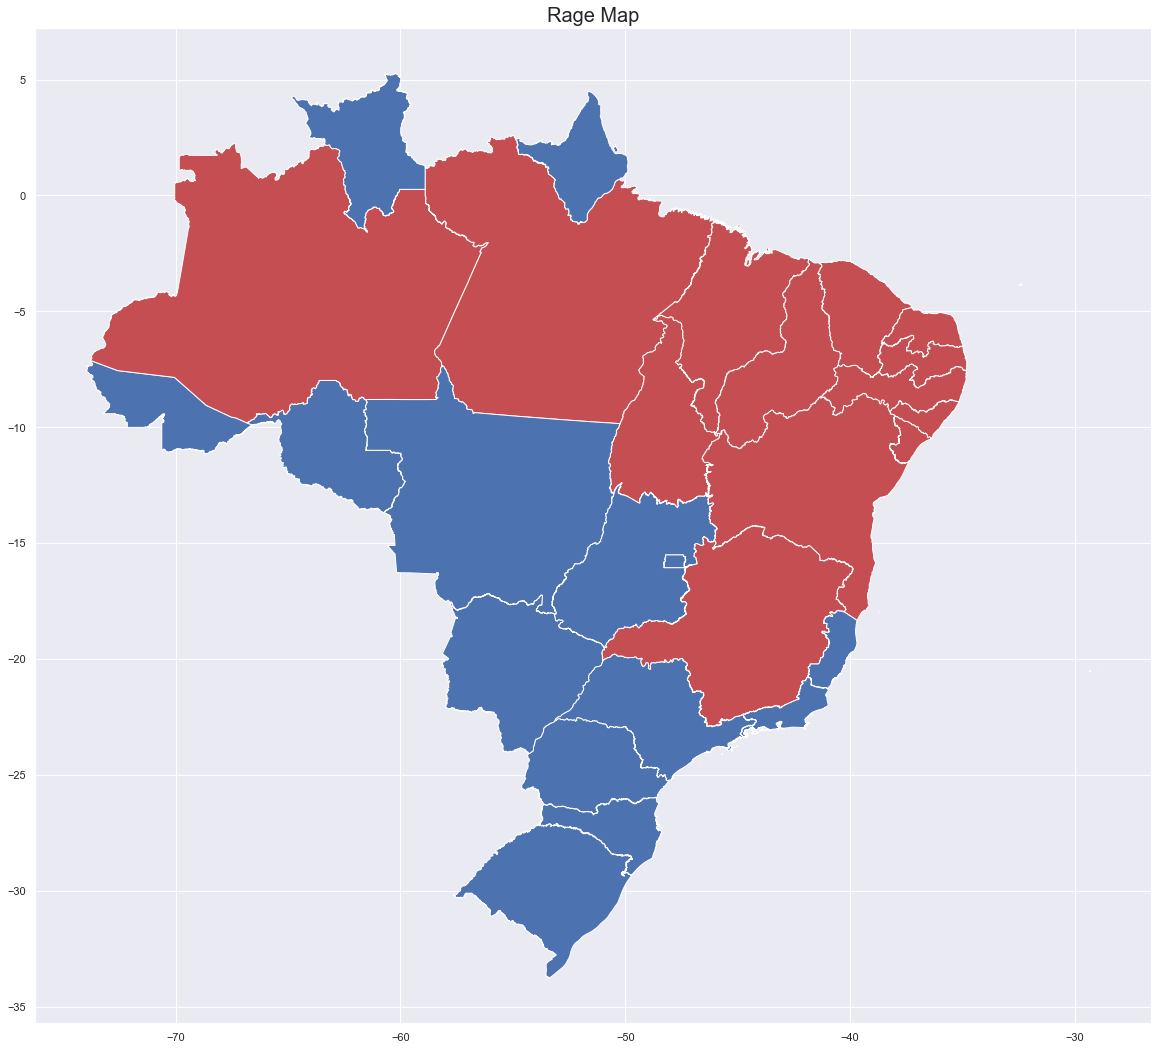

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
mapa_uf_vot.plot(column='13_bin', color=mapa_uf_vot['13_color'], figsize=(10,10), ax=ax)
# ax.set_axis_off();
ax.set_title("Rage Map", fontsize=20)
plt.savefig('rage_map.pdf')

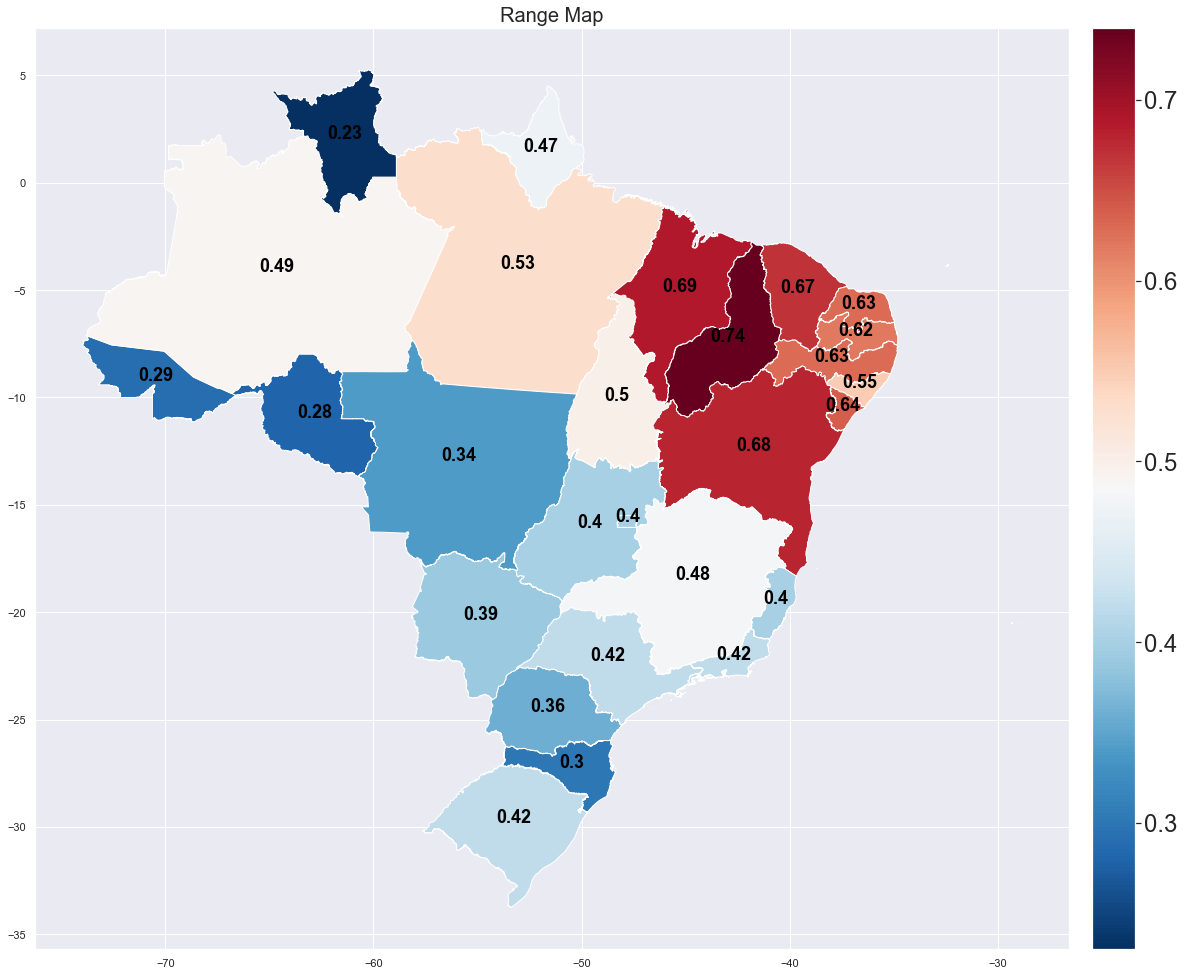

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
mapa_uf_vot.plot(column='13r', cmap='RdBu_r', figsize=(10,10), legend=True, ax=ax, cax=cax)
mapa_uf_vot.apply(lambda x: ax.annotate(text=x['13r'], xy=x.geometry.centroid.coords[0], ha='center', color='black', fontsize=18, fontweight='bold'), axis=1);
# ax.set_axis_off();
for t in cax.get_yticklabels():
   t.set_fontsize(24)
ax.set_title("Range Map", fontsize=20)
# ax.set_caption('teste')
plt.savefig('range_map.pdf')

  


In [ ]:
print(len(mapa), len(vot_mun[:len(mapa)]))

5572 5572


In [224]:
mapa['ufmun'] = mapa['SIGLA']+mapa['NM_MUN']

In [225]:
vot_mun['ufmun'] = vot_mun['SG_UF']+vot_mun['NM_MUNICIPIO']

In [234]:
vot_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         5711 non-null   object 
 1   CD_MUNICIPIO  5711 non-null   object 
 2   NM_MUNICIPIO  5711 non-null   object 
 3   13            5709 non-null   float64
 4   22            5708 non-null   float64
 5   95            5673 non-null   float64
 6   96            5686 non-null   float64
 7   All           5710 non-null   float64
 8   sgmun         5711 non-null   object 
 9   ufmun         5711 non-null   object 
dtypes: float64(5), object(5)
memory usage: 446.3+ KB


In [236]:
mapa_vot = mapa.merge(vot_mun, on='ufmun')

In [240]:
mapa_vot['13_bin'] = mapa_vot[13] > mapa_vot[22]

In [241]:
mapa_vot['13_color'] = mapa_vot['13_bin'].apply(lambda x: 'r' if x == True else 'b')

/Users/adriano/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


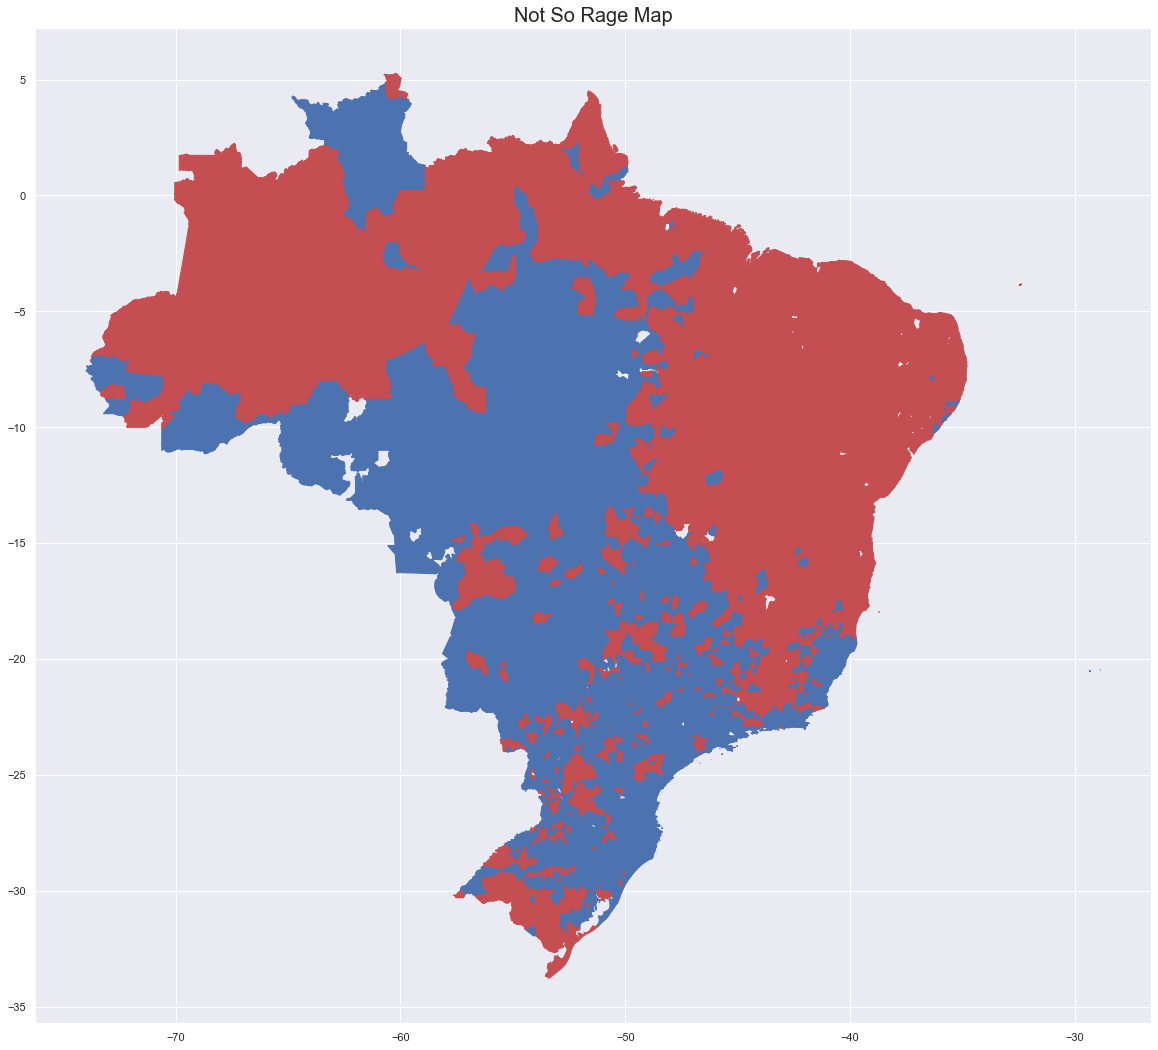

In [243]:
fig, ax = plt.subplots(figsize=(20,20))
mapa_vot.plot(column='13_bin', color=mapa_vot['13_color'], edgecolor=mapa_vot['13_color'], ax=ax)
# ax.set_axis_off();
ax.set_title("Not So Rage Map", fontsize=20)
plt.savefig('rage_map_mun.pdf')

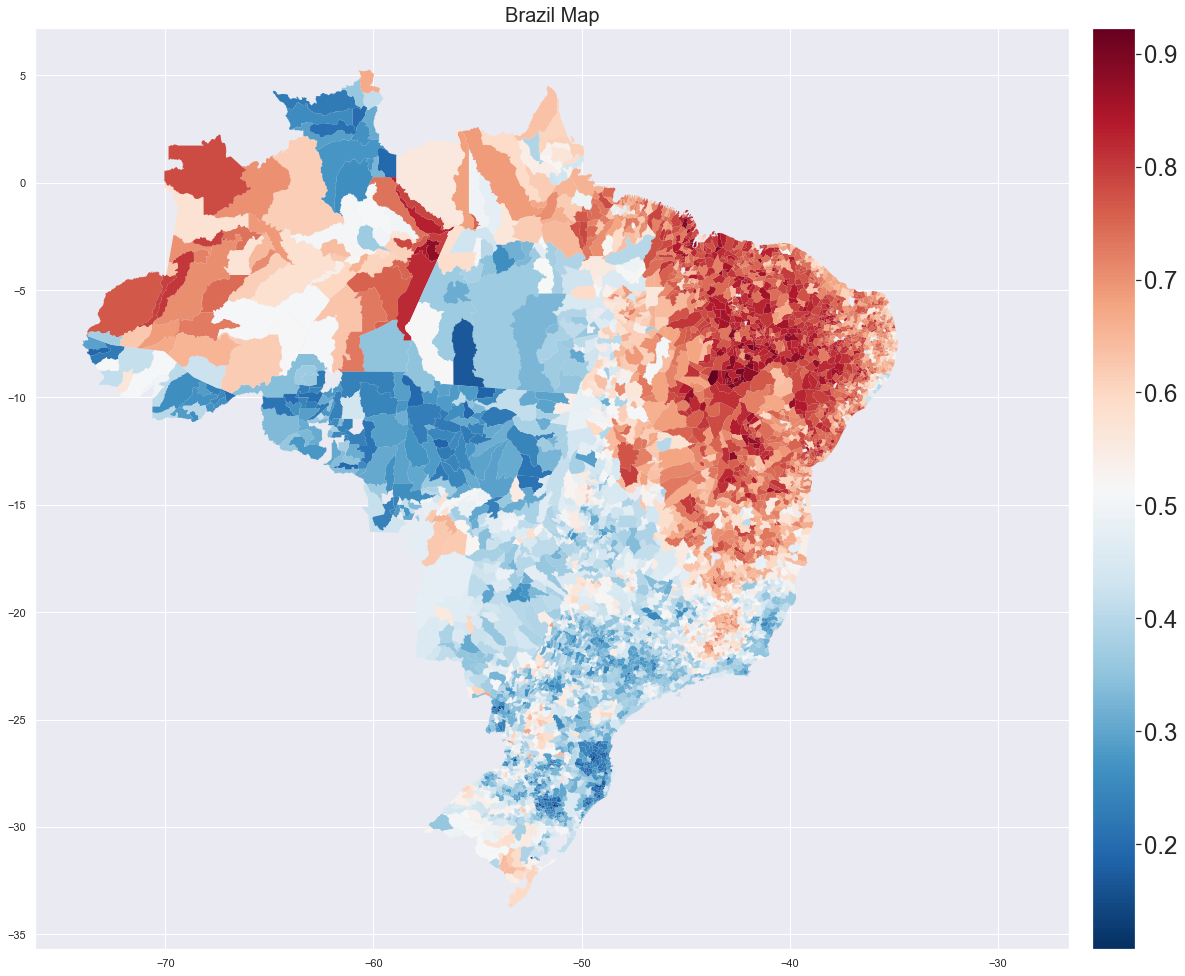

In [244]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
mapa_vot.plot(column=13, cmap='RdBu_r', legend=True, edgecolor='none', ax=ax, cax=cax)
# mapa_vot.apply(lambda x: ax.annotate(text=x['13r'], xy=x.geometry.centroid.coords[0], ha='center', color='black', fontsize=18, fontweight='bold'), axis=1);
# ax.set_axis_off();
for t in cax.get_yticklabels():
   t.set_fontsize(24)
ax.set_title("Brazil Map", fontsize=20)
# ax.set_caption('teste')
plt.savefig('brazil_map.pdf')

In [220]:
mapa_vot = mapa.merge(vot_mun[:len(mapa)], left_on=['SIGLA, NM_MUN'], right_on=['SG_UF','NM_MUNICIPIO'], how='left')
mapa_vot

ValueError: len(right_on) must equal len(left_on)